Analysis of 5 replica of normal MD of the crystal structure. The analysis obtains the distancs, hinge helicity, cmap values of specific residues and number if protein DNA hydrogen bonds ans well as protein-protein hydrogen bonds from gromacs analysis. 

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import numpy as np
import sys
import mdtraj as md
sys.path.append("/home/x_mallu/mln_lf/")
from gmx_tool import plotting_gmx

In [2]:
#plt.style.use("dark_background")
#sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 1})

In [3]:
folder = "/home/x_mallu/mln_lf/EXP-21-BV4028_contains_unbiased/06-unbiased_SymL/"
topo = folder + "1/1efa_noTet_99sbws_proc_mod_resID.pdb"

In [30]:
traj1 = md.load_xtc(folder + "1/md_compact_vac_no_jump.xtc", top=topo)
traj2 = md.load_xtc(folder + "2/md_compact_vac_no_jump.xtc", top=topo)
traj3 = md.load_xtc(folder + "3/md_compact_vac_no_jump.xtc", top=topo)
traj4 = md.load_xtc(folder + "4/md_compact_vac_no_jump.xtc", top=topo)
traj5 = md.load_xtc(folder + "5/md_compact_vac_no_jump.xtc", top=topo)

traj1

<mdtraj.Trajectory with 501 frames, 11692 atoms, 718 residues, and unitcells at 0x7fd39f6d1190>

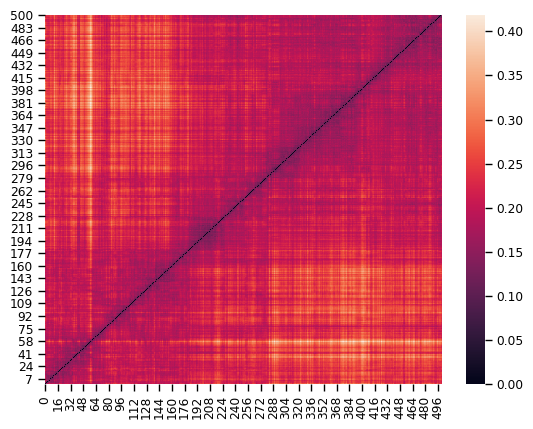

In [31]:
# do some RMSD analysis

rmsd_frames = []
for i in range(501):
    
    rmsd = md.rmsd(traj1,traj1, frame=i, atom_indices=np.arange(1,948,1)+np.arange(5086,6033,1) )
    rmsd_frames.append(rmsd)
    
rmsd_matrix = pd.DataFrame(rmsd_frames)
sns.heatmap(rmsd_matrix.iloc[::-1])
plt.show()

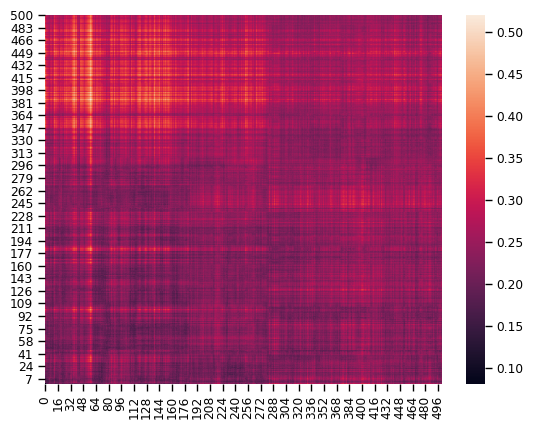

In [32]:
# do some RMSD analysis

rmsd_frames = []
for i in range(501):
    
    rmsd = md.rmsd(traj1,traj2, frame=i, atom_indices=np.arange(1,948,1)+np.arange(5086,6033,1) )
    rmsd_frames.append(rmsd)
    
rmsd_matrix = pd.DataFrame(rmsd_frames)
sns.heatmap(rmsd_matrix.iloc[::-1])
plt.show()

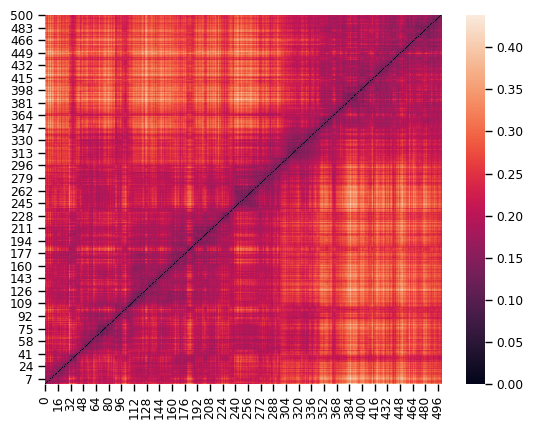

In [37]:
# do some RMSD analysis

rmsd_frames = []
for i in range(501):
    
    rmsd = md.rmsd(traj2,traj2, frame=i, atom_indices=np.arange(1,948,1)+np.arange(5086,6033,1) )
    rmsd_frames.append(rmsd)
    
rmsd_matrix = pd.DataFrame(rmsd_frames)
sns.heatmap(rmsd_matrix.iloc[::-1])
plt.show()

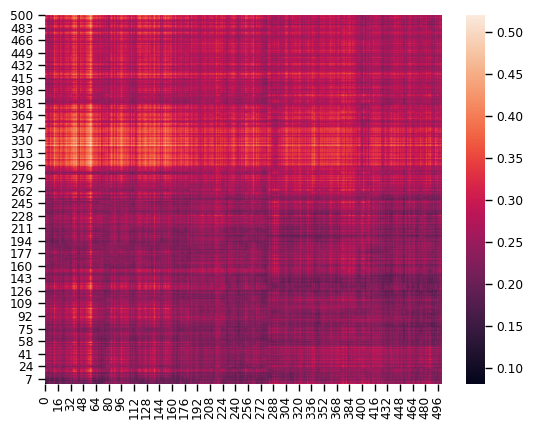

In [33]:
# do some RMSD analysis

rmsd_frames = []
for i in range(501):
    
    rmsd = md.rmsd(traj1,traj3, frame=i, atom_indices=np.arange(1,948,1)+np.arange(5086,6033,1) )
    rmsd_frames.append(rmsd)
    
rmsd_matrix = pd.DataFrame(rmsd_frames)
sns.heatmap(rmsd_matrix.iloc[::-1])
plt.show()

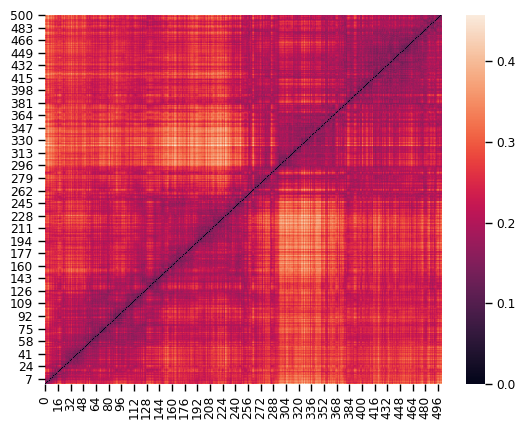

In [38]:
# do some RMSD analysis

rmsd_frames = []
for i in range(501):
    
    rmsd = md.rmsd(traj3,traj3, frame=i, atom_indices=np.arange(1,948,1)+np.arange(5086,6033,1) )
    rmsd_frames.append(rmsd)
    
rmsd_matrix = pd.DataFrame(rmsd_frames)
sns.heatmap(rmsd_matrix.iloc[::-1])
plt.show()

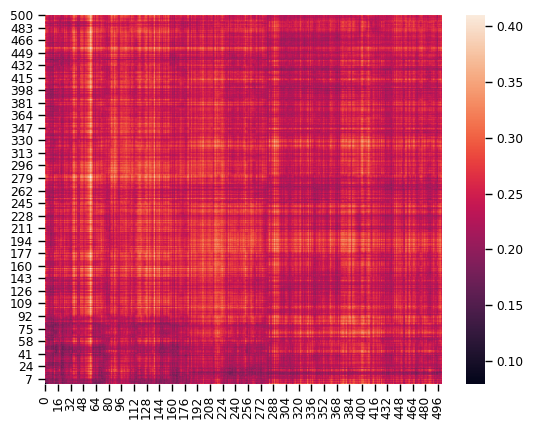

In [34]:
# do some RMSD analysis

rmsd_frames = []
for i in range(501):
    
    rmsd = md.rmsd(traj1,traj4, frame=i, atom_indices=np.arange(1,948,1)+np.arange(5086,6033,1) )
    rmsd_frames.append(rmsd)
    
rmsd_matrix = pd.DataFrame(rmsd_frames)
sns.heatmap(rmsd_matrix.iloc[::-1])
plt.show()

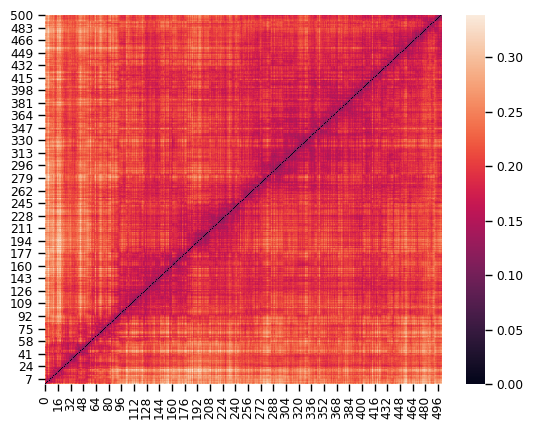

In [39]:
# do some RMSD analysis

rmsd_frames = []
for i in range(501):
    
    rmsd = md.rmsd(traj4,traj4, frame=i, atom_indices=np.arange(1,948,1)+np.arange(5086,6033,1) )
    rmsd_frames.append(rmsd)
    
rmsd_matrix = pd.DataFrame(rmsd_frames)
sns.heatmap(rmsd_matrix.iloc[::-1])
plt.show()

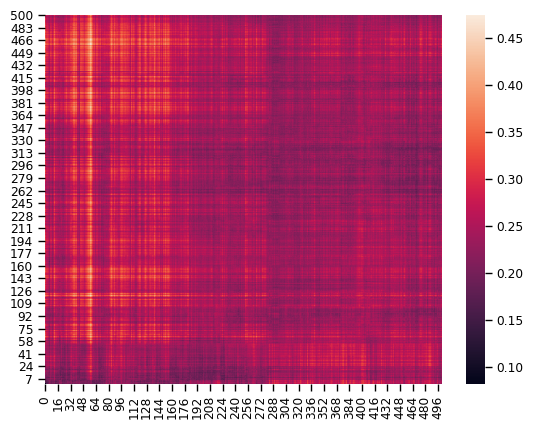

In [36]:
# do some RMSD analysis

rmsd_frames = []
for i in range(501):
    
    rmsd = md.rmsd(traj1,traj5, frame=i, atom_indices=np.arange(1,948,1)+np.arange(5086,6033,1) )
    rmsd_frames.append(rmsd)
    
rmsd_matrix = pd.DataFrame(rmsd_frames)
sns.heatmap(rmsd_matrix.iloc[::-1])
plt.show()

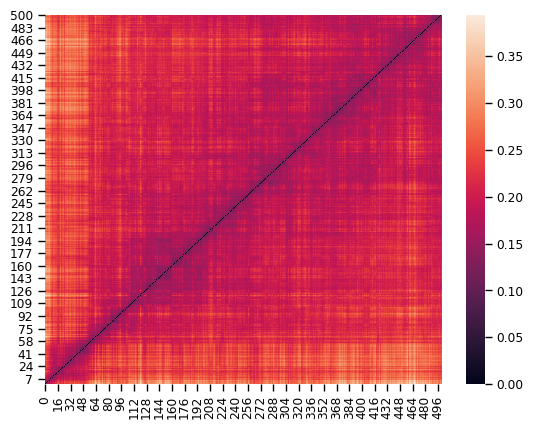

In [40]:
# do some RMSD analysis

rmsd_frames = []
for i in range(501):
    
    rmsd = md.rmsd(traj5,traj5, frame=i, atom_indices=np.arange(1,948,1)+np.arange(5086,6033,1) )
    rmsd_frames.append(rmsd)
    
rmsd_matrix = pd.DataFrame(rmsd_frames)
sns.heatmap(rmsd_matrix.iloc[::-1])
plt.show()

In [4]:
def read_CVs(folder):
    """Read the extra files containing information on other collective variables not written in the COLVAR file.
    
    """
    
    CVs = pd.read_csv(folder + "CVs", sep='\s+', skiprows=1, \
    names=['Time (ps)', 'Contacts', 'Formed Helices', 'DNA bent (rad)', 'Hinge Distance (nm)',\
           'Distance Hinge A to DNA (nm)',\
           'Distance Hinge B to DNA (nm)', 'Specific Contacts', 'Hinge Helix Contacts'])
    
    cmap_sum = pd.read_csv(folder + "distances", sep='\s+', skiprows=1, \
    names=['Time (ps)', 'dist1', 'dist2', 'dist3', 'dist4', 'dist5', 'dist6', 'dist7', \
           'dist8', 'dist9', 'dist10', 'dist11', 'dist12', 'dist13', 'dist14', 'dist15', \
           'dist16', 'dist17', 'dist18', 'dist19', 'dist20', 'dist21'])
    
    CVs["DNA Bent (deg)"] = (-1)*(((CVs['DNA bent (rad)']/(np.pi))*180)-180)

    plt.figure(figsize=(4,3))


    return(CVs)

In [5]:
def CVs_replicas(folder, N_replica):
    CVs = []
    for i in np.arange(1,N_replica+1,1):
        Cv_N = read_CVs(folder+'{}/'.format(i))
        Cv_N["Time (ns)"] = Cv_N["Time (ps)"]/1000
        Cv_N["replica"] = [i for x in range(len(Cv_N))]
        Cv_N["Hinge DNA\nDistance (nm)"] = (Cv_N["Distance Hinge A to DNA (nm)"]+Cv_N["Distance Hinge A to DNA (nm)"])/2
        CVs.append(Cv_N)
    CVs_all = pd.concat([x for x in CVs])
    return(CVs_all)

In [8]:
CVs = CVs_replicas(folder,5)

In [9]:
CVs.to_csv(folder+"CVs.dat")

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

<Figure size 400x300 with 0 Axes>

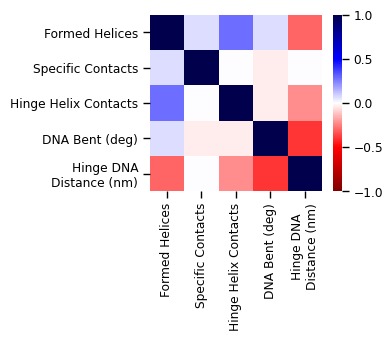

In [10]:
plt.subplots(figsize=(4.,3.5))


coor = CVs.drop(columns=["Time (ps)","Time (ns)","replica","DNA bent (rad)","Contacts","Hinge Distance (nm)",\
                        "Distance Hinge A to DNA (nm)", "Distance Hinge B to DNA (nm)"]).corr()
sns.heatmap(coor,cmap='seismic_r',vmin=-1, vmax=1)
plt.tight_layout()
#
plt.show()

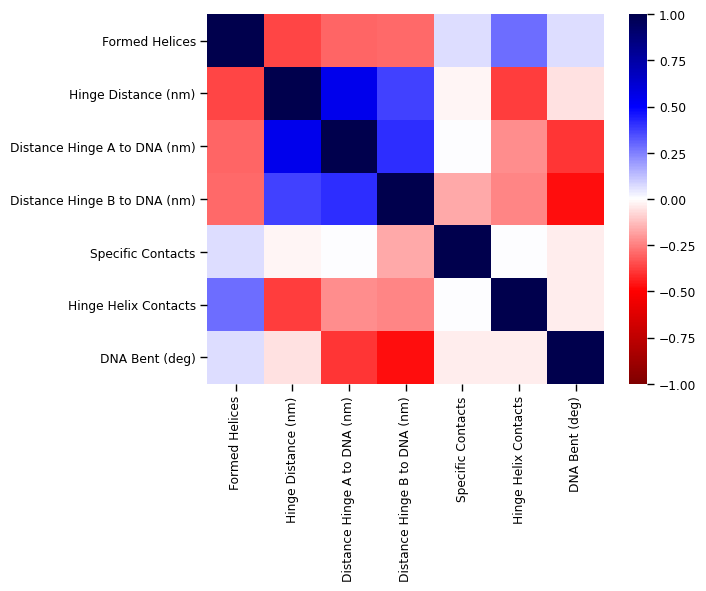

In [11]:
coor = CVs.drop(columns=["Time (ps)","Time (ns)","replica","DNA bent (rad)","Contacts","Hinge DNA\nDistance (nm)"]).corr()
sns.heatmap(coor,cmap='seismic_r',vmin=-1, vmax=1)
plt.show()

In [12]:
CVs

Time (ps)   Contacts  Formed Helices  DNA bent (rad)  \
0          0.0  20.996838        3.999764        2.418768   
1        100.0  20.762344        3.999669        2.347983   
2        200.0  20.945133        3.999883        2.395542   
3        300.0  20.730013        3.999891        2.337803   
4        400.0  20.885837        3.999884        2.219915   
..         ...        ...             ...             ...   
496    49600.0  19.784769        3.906233        2.254667   
497    49700.0  20.403616        3.995682        2.205094   
498    49800.0  20.147085        3.996010        2.254347   
499    49900.0  20.659095        3.999791        2.182830   
500    50000.0  19.973321        3.999272        2.185319   

     Hinge Distance (nm)  Distance Hinge A to DNA (nm)  \
0               0.966704                      0.946325   
1               0.968684                      0.906959   
2               0.977909                      0.893376   
3               0.979091                      0.912505   
4               0.986981                      0.897994   
..                   ...                           ...   
496             1.050949                      0.951914   
497             1.052654                      0.919416   
498             1.027957                      0.920249   
499             1.007332                      0.930260   
500             1.038058                      0.897852   

     Distance Hinge B to DNA (nm)  Specific Contacts  Hinge Helix Contacts  \
0                        0.882378          13.998075              6.998763   
1                        0.892155          13.853525              6.908819   
2                        0.882018          13.945198              6.999935   
3                        0.901291          13.844027              6.885986   
4                        0.910720          13.980670              6.905168   
..                            ...                ...                   ...   
496                      0.793258          13.907178              5.877590   
497                      0.797648          13.925908              6.477708   
498                      0.816103          13.847649              6.299436   
499                      0.838258          13.926614              6.732481   
500                      0.821419          13.838876              6.134445   

     DNA Bent (deg)  Time (ns)  replica  Hinge DNA\nDistance (nm)  
0         41.414802        0.0        1                  0.946325  
1         45.470484        0.1        1                  0.906959  
2         42.745554        0.2        1                  0.893376  
3         46.053755        0.3        1                  0.912505  
4         52.808240        0.4        1                  0.897994  
..              ...        ...      ...                       ...  
496       50.817097       49.6        5                  0.951914  
497       53.657420       49.7        5                  0.919416  
498       50.835431       49.8        5                  0.920249  
499       54.933054       49.9        5                  0.930260  
500       54.790444       50.0        5                  0.897852  

[2505 rows x 13 columns]

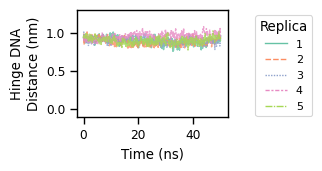

In [13]:
#plt.subplots(figsize=(2.2,1.8))
plt.subplots(figsize=(4.5,1.8))
sns.lineplot(data = CVs[::1], y = "Hinge DNA\nDistance (nm)", x = "Time (ns)", alpha = 0.8, hue = "replica",
            style="replica", palette="Set2")
plt.ylim(-0.1,1.3)
plt.legend(markerscale=0.4, fontsize=8, title="Replica",  bbox_to_anchor=(1.1, 0.5, 0.5, 0.5))
#plt.legend([],[],  bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.tight_layout()
#
plt.savefig("/home/x_mallu/mln_lf/EXP-21-BV4028_contains_unbiased/plots_Dec22/Hinge_DNA_dist_lg.pdf", dpi=300)
plt.show()

In [14]:
hbonds = plotting_gmx.plot_hb_num(folder + "1/ana/" )

In [15]:
def plot_hbonds(folder,replica):
    hbonds = plotting_gmx.plot_hb_num(folder + "1/ana/" )[1]
    hbonds['replica'] = [1 for x in range(len(hbonds))]
    hbonds.rename(columns={"h-bonds":"Protein-DNA H-Bonds"}, inplace=True)
    for i in np.arange(2,replica+1,1):
        hbonds_n = plotting_gmx.plot_hb_num(folder+'{}/ana/'.format(i))[1]
        hbonds_n['replica'] = [i for x in range(len(hbonds_n))]
        hbonds_n.rename(columns={"h-bonds":"Protein-DNA H-Bonds"}, inplace=True)
        hbonds = hbonds.append(hbonds_n)
    plt.show()
    return(hbonds)

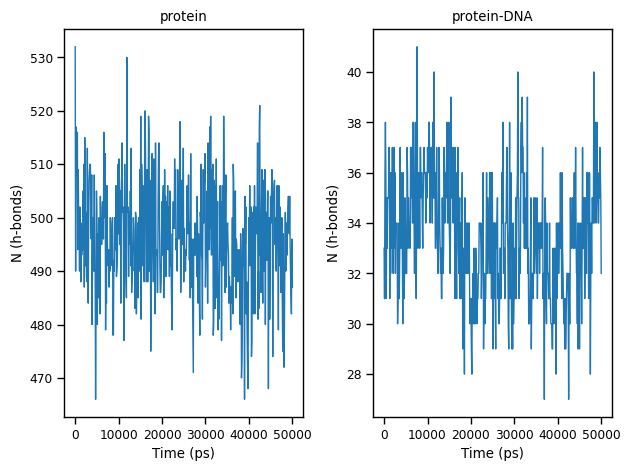

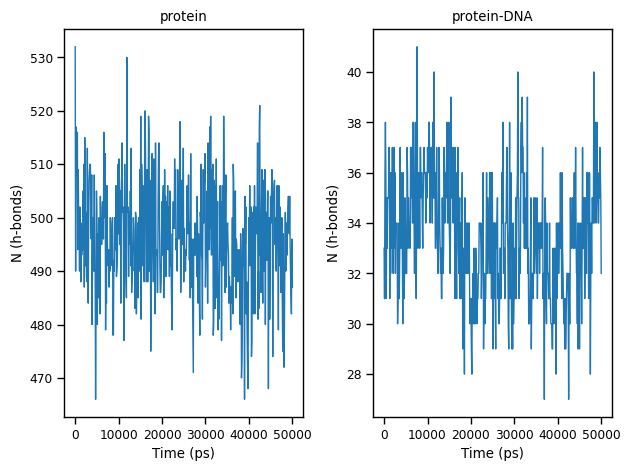

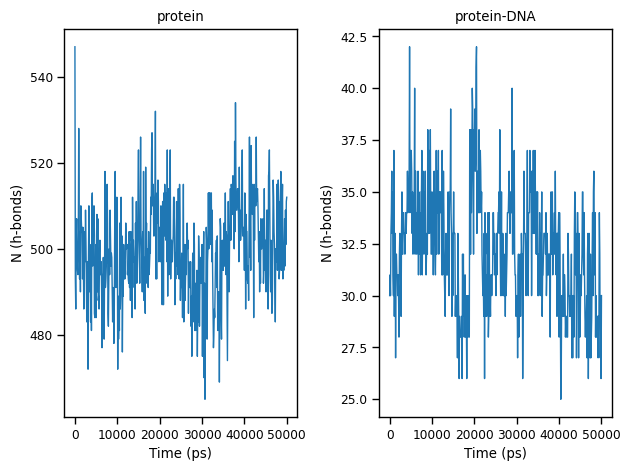

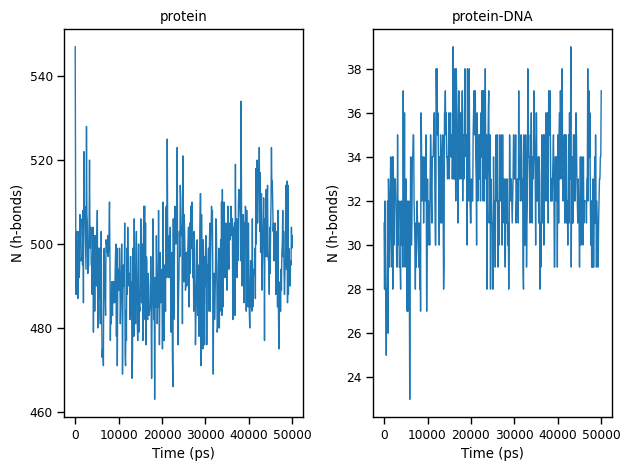

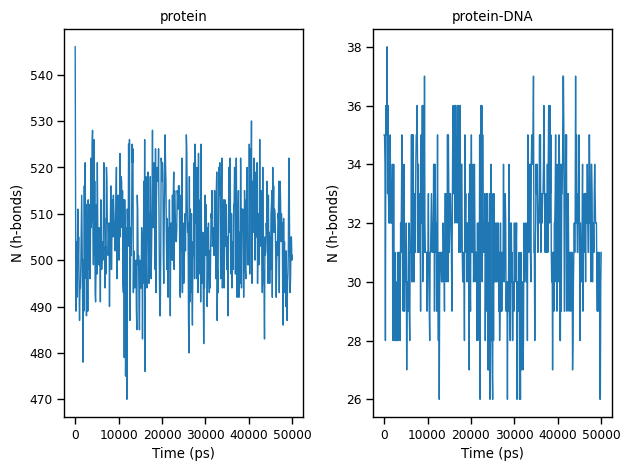

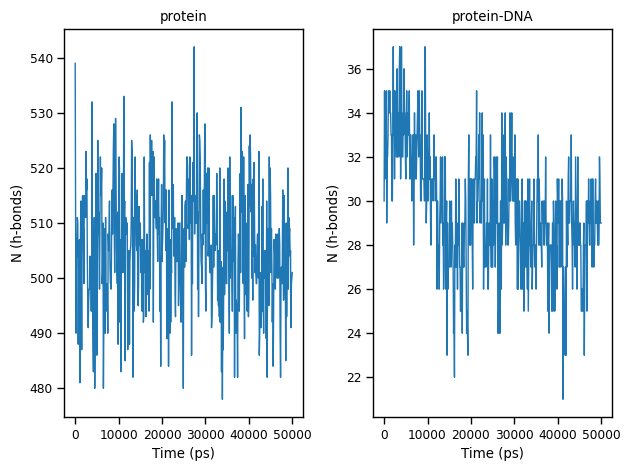

In [16]:
hbonds = plot_hbonds(folder,5)

In [17]:
hbonds.mean(),hbonds.std()

(Time (ps)               25000.000000
 Protein-DNA H-Bonds        31.910978
 pairs within 0.35 nm       13.785629
 replica                     3.000000
 dtype: float64,
 Time (ps)               14465.483043
 Protein-DNA H-Bonds         2.879582
 pairs within 0.35 nm        3.991299
 replica                     1.414496
 dtype: float64)

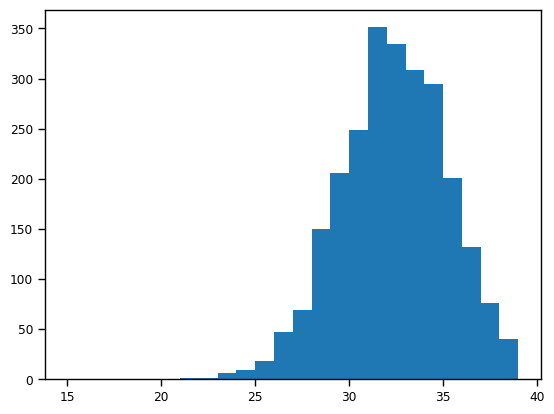

In [18]:
y_hb,x_hb,p_hb = plt.hist(hbonds[::1]["Protein-DNA H-Bonds"], bins=np.arange(15,40,1))
plt.show()

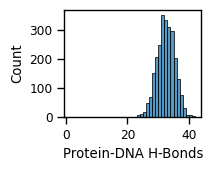

In [19]:
plt.subplots(figsize=(2.2,1.8))
sns.histplot(data=hbonds, x="Protein-DNA H-Bonds", binwidth=1 )
plt.xlim(-0.5,44)
#plt.legend(markerscale=0.4, fontsize=8)
plt.tight_layout()

#plt.savefig(folder + "H_bonds.pdf", dpi=300)
plt.show()

In [21]:
def get_mean_hist(data, feature, bindef):    
    x_rep = []
    for i in np.array(data["replica"][0]):

        x, y  = np.histogram(data[(data["replica"] == i)][feature],\
                 bins = bindef, density = True)
        x_rep.append(x)
        
    return(x_rep)
def Write_Probability_Data_Frame(CV, bin_range, plot_t="bar", hbonds_=False):
    """
    
    """
    
    if hbonds_==True:
        #SymL = get_mean_hist(hbonds, CV, bin_range)
        ub = get_mean_hist(hbonds, CV, bin_range)
        #NMR = get_mean_hist_NMR(CV, bin_range, data=NMR_hbonds)
    else:
        #NOD = get_mean_hist(CVs, "NMR, NOD", CV, bin_range)
        #SymL = get_mean_hist(CVs, CV, bin_range)
        ub = get_mean_hist(CVs, CV, bin_range)
        #NMR = get_mean_hist_NMR(CV, bin_range)
    


    #df = pd.DataFrame({"Simulation":["MetaD, NOD" for x in range(len(NOD))]*(len(bin_range)-1)+\
    #              ["Unbiased, OSymL" for x in range(len(ub))]*(len(bin_range)-1)+\
    #                                   ["MetaD, OSymL" for x in range(len(SymL))]*(len(bin_range)-1), "Probability":\
    #              [x for y in NOD for x in y]+[x for y in ub for x in y]+\
    #                                   [x for y in SymL for x in y],\
    #             CV: [x for y in [bin_range[1:] for x in range(15)] for x in y]})
    
    df = pd.DataFrame({"Simulation":\
                  ["Unbiased, OSymL" for x in range(len(ub))]*(len(bin_range)-1), "Probability":\
                  [x for y in ub for x in y],\
                 CV: [x for y in [bin_range[1:] for x in range(5)] for x in y]})
    
    ax = sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 1}) #font size is 10
    
    fig, axs = plt.subplots(figsize=(2.2,1.8))
    
    #sns.stripplot(data = df, y="Probability", x="Specific Contacts", hue = "Simulation",\
    #            hue_order=["NMR, NOD","Unbiased, OSymL"], size=2, palette=["orange", "cyan"])

    #sns.barplot(data = df, y="Probability", x=CV, hue = "Simulation",\
    #            hue_order=["NMR, NOD","Unbiased, OSymL"], ci=68, errwidth=1, capsize=.15, \
    #            palette=["orange", "cyan"], errcolor=".5", edgecolor=".5")
    
    if plot_t=="bar":
        sns.barplot(data = df, y="Probability", x=CV, hue = "Simulation",\
                 ci=68, errwidth=1, capsize=.15, \
                palette=["cyan"], errcolor=".5", edgecolor=".5")
        plt.xlim(-1,bin_range[-1])
        plt.ylim(-0.1,1.1)

        if (CV=="Specific Contacts") :
            plt.xticks(np.arange(0,bin_range[-1],5),np.arange(1,bin_range[-1]+1,5))
        else:
            plt.xticks(np.arange(0,bin_range[-1],1),np.arange(1,bin_range[-1]+1,1))
        
        
    if plot_t=="line":
        df.drop(columns=CV)
        df[CV]=[x for y in [bin_range[:-1] for x in range(5)] for x in y]
        sns.lineplot(data = df, y="Probability", x=CV, hue = "Simulation", ci=68, \
                palette=["cyan"], style="Simulation")

        if (CV=="Specific Contacts") :
            plt.xticks(np.arange(0,bin_range[-1],5),np.arange(0,bin_range[-1],5))
        elif (CV=="DNA Bent (deg)") or (CV=="Protein-DNA H-Bonds"):
            plt.xticks(np.arange(0,bin_range[-1],10),np.arange(0,bin_range[-1],10))
        else:
            plt.xticks(np.arange(0,bin_range[-1]+1,1),np.arange(0,bin_range[-1]+1,1))
        plt.xlim(bin_range[0]-1/15,bin_range[-1]+1/15)

    plt.legend([],[])
    #plt.ylim(-0.1,1.1)
   

    plt.tight_layout()
    #plt.savefig(\
    #"/home/x_mallu/mln_lf/EXP-21-BV4028_contains_unbiased/plots_Dec22/{}_hist_versus unbiased.pdf".format(CV), \
    #            dpi=300)
    plt.show()
    
    return(df)

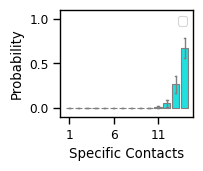

Simulation  Probability  Specific Contacts
0   Unbiased, OSymL     0.000000                  1
1   Unbiased, OSymL     0.000000                  2
2   Unbiased, OSymL     0.000000                  3
3   Unbiased, OSymL     0.000000                  4
4   Unbiased, OSymL     0.000000                  5
..              ...          ...                ...
65  Unbiased, OSymL     0.000000                 10
66  Unbiased, OSymL     0.000000                 11
67  Unbiased, OSymL     0.000000                 12
68  Unbiased, OSymL     0.057884                 13
69  Unbiased, OSymL     0.942116                 14

[70 rows x 3 columns]

In [22]:
Write_Probability_Data_Frame("Specific Contacts", np.arange(0,15,1))

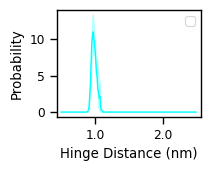

Simulation  Probability  Hinge Distance (nm)
0    Unbiased, OSymL          0.0                 0.50
1    Unbiased, OSymL          0.0                 0.51
2    Unbiased, OSymL          0.0                 0.52
3    Unbiased, OSymL          0.0                 0.53
4    Unbiased, OSymL          0.0                 0.54
..               ...          ...                  ...
990  Unbiased, OSymL          0.0                 2.44
991  Unbiased, OSymL          0.0                 2.45
992  Unbiased, OSymL          0.0                 2.46
993  Unbiased, OSymL          0.0                 2.47
994  Unbiased, OSymL          0.0                 2.48

[995 rows x 3 columns]

In [23]:
Write_Probability_Data_Frame("Hinge Distance (nm)", np.arange(0.5,2.5,0.01), plot_t="line")

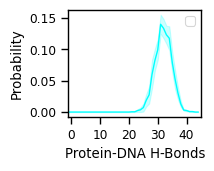

Simulation  Probability  Protein-DNA H-Bonds
0    Unbiased, OSymL          0.0                   -1
1    Unbiased, OSymL          0.0                    0
2    Unbiased, OSymL          0.0                    1
3    Unbiased, OSymL          0.0                    2
4    Unbiased, OSymL          0.0                    3
..               ...          ...                  ...
225  Unbiased, OSymL          0.0                   40
226  Unbiased, OSymL          0.0                   41
227  Unbiased, OSymL          0.0                   42
228  Unbiased, OSymL          0.0                   43
229  Unbiased, OSymL          0.0                   44

[230 rows x 3 columns]

In [24]:
Write_Probability_Data_Frame("Protein-DNA H-Bonds", np.arange(-1,46,1), plot_t="line", hbonds_=True)

The RMSD has been analysed by aligning the protein core, the stable region of the complex. The DNA moves a lot with respect to this reference.

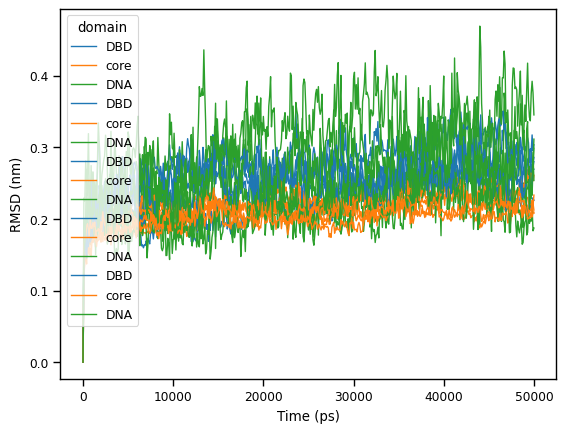

In [25]:
rmsd = plotting_gmx.plot_ana_rmsd(folder + "1/ana/" )
rmsd['replica'] = [1 for x in range(len(rmsd))]
rmsd["Time (ns)"] = rmsd["Time (ps)"]/1000
for i in [2,3,4,5]:
    rmsd_n = plotting_gmx.plot_ana_rmsd(folder+'{}/ana/'.format(i))
    rmsd_n['replica'] = [i for x in range(len(rmsd_n))]
    rmsd_n["Time (ns)"] = rmsd_n["Time (ps)"]/1000
    rmsd = rmsd.append(rmsd_n)
plt.show()

In [26]:
rmsd_DBD = rmsd[rmsd["domain"]=="DBD"]
rmsd_DNA = rmsd[rmsd["domain"]=="DNA"]
rmsd_core = rmsd[rmsd["domain"]=="core"]

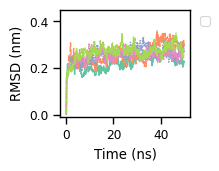

In [28]:
plt.subplots(figsize=(2.4,1.8))
sns.lineplot(data = rmsd_DBD, x = "Time (ns)", y = "RMSD (nm)", hue = "replica", style="replica", palette="Set2")
plt.ylim(-0.01,0.45)
#plt.legend(markerscale=0.4, fontsize=8, ncol=2)
plt.legend([],[],  bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.tight_layout()

#plt.savefig(folder + "DBD_rmsd.pdf", dpi=300)
plt.show()

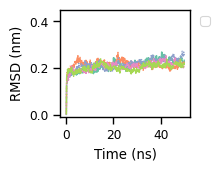

In [29]:

plt.subplots(figsize=(2.4,1.8))
sns.lineplot(data = rmsd_core, x = "Time (ns)", y = "RMSD (nm)", hue = "replica", style="replica", palette="Set2")
plt.ylim(-0.01,0.45)
#plt.legend(markerscale=0.4, fontsize=8, ncol=2)
plt.legend([],[],  bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.tight_layout()

#plt.savefig(folder + "/Core_rmsd.pdf", dpi=300)
plt.show()

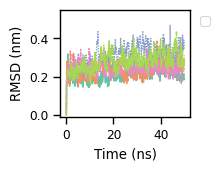

In [30]:

plt.subplots(figsize=(2.4,1.8))
sns.lineplot(data = rmsd_DNA, x = "Time (ns)", y = "RMSD (nm)", hue = "replica", style="replica", palette="Set2")
plt.ylim(-0.01,0.55)
#plt.legend(markerscale=0.4, fontsize=8, ncol=2)
plt.legend([],[],  bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))
plt.tight_layout()

#plt.savefig(folder + "DNA_rmsd.pdf", dpi=300)
plt.show()

In [31]:
names=['A:Leu6', 'A:Tyr7', 'A:Tyr17', 'A:Gln18', 'A:Ser21', 'A:Arg22', 'A:His29'\
          ,'B:Leu6', 'B:Tyr7', 'B:Tyr17', 'B:Gln18', 'B:Ser21', 'B:Arg22', 'B:His29', 
           'Arg51', 'Val52', 'Ala53', 'Glu54', 'Glu55', 'Leu56',  'Ala57']
residue_dict = dict(zip(names, np.arange(0,len(names)+1,1)))
names_A = ['A:Leu6', 'A:Tyr7', 'A:Tyr17', 'A:Gln18', 'A:Ser21', 'A:Arg22', 'A:His29']
names_B = ['B:Leu6', 'B:Tyr7', 'B:Tyr17', 'B:Gln18', 'B:Ser21', 'B:Arg22', 'B:His29']
names_hinge= ['Arg51', 'Val52', 'Ala53', 'Glu54', 'Glu55', 'Leu56',  'Ala57']
residue_dict

def plot_cmap(residue_list, file = folder):
    """Plotting of all distances between contacts in the cmap CV.
    
    """
    
    df_distances = pd.read_csv(file + "distances", sep='\s+', skiprows=0)

    names = residue_list
    list_dist = []
    
    # find out what residues you are analysing add the data to your df for plotting
    
    start, end = residue_dict[residue_list[0]],residue_dict[residue_list[-1]]
    
    for (i,j) in zip( range(start,end+1,1), names):
        df = pd.DataFrame({ 'Time (ps)':  list(df_distances.iloc[:,0]), 'Protein Residues' : \
                           [j for x in range(len((df_distances.iloc[:,0])))],\
                           "Distance (nm)" : list(df_distances.iloc[:,i+1])})
        list_dist.append(df)
    
    df_all = pd.concat([df for df in list_dist])
    return(df_all)

def plot_cdist(names, replica):
    "plot the distances from different replicas"
    
    cmap = plot_cmap(names, folder+"{}/".format(replica))
    sns.lineplot(data = cmap, x = "Time (ps)", y = "Distance (nm)", hue = "Protein Residues")
    plt.show()
    
def plot_hist_cdist(names, replica):
    "Plot a histogram for the data from several replicas"
    
    cmap = []
    for i in np.arange(1,replica+1,1):
    
        cmap_N = plot_cmap(names, folder+"{}/".format(i))
        cmap_N["replica"] = [i for x in range(len(cmap_N))]
        cmap.append(cmap_N)
    cmap = pd.concat([df for df in cmap])
    sns.histplot(data = cmap, x = "Distance (nm)", hue = "Protein Residues", element="poly")
    plt.xlim(0.2,2.5)
    plt.show()

In [32]:
plot_cmap(names_A, folder+"1/")

Time (ps) Protein Residues  Distance (nm)
0          0.0           A:Leu6       0.474794
1        100.0           A:Leu6       0.484394
2        200.0           A:Leu6       0.415369
3        300.0           A:Leu6       0.433133
4        400.0           A:Leu6       0.471708
..         ...              ...            ...
496    49600.0          A:His29       0.470903
497    49700.0          A:His29       0.454714
498    49800.0          A:His29       0.437591
499    49900.0          A:His29       0.458809
500    50000.0          A:His29       0.430406

[3507 rows x 3 columns]

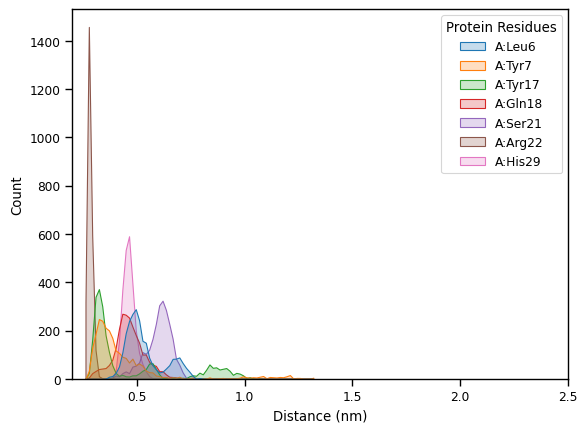

In [33]:
plot_hist_cdist(names_A,5)


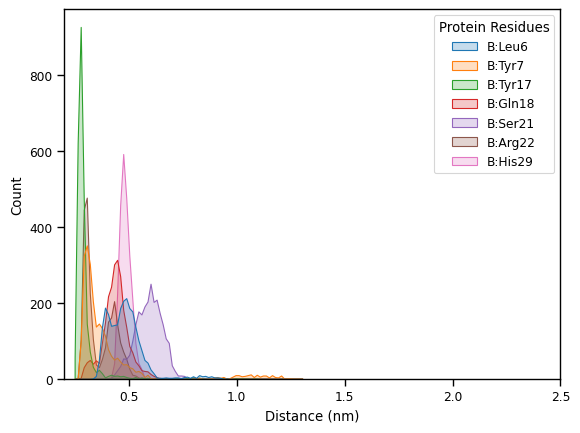

In [34]:
plot_hist_cdist(names_B,5)

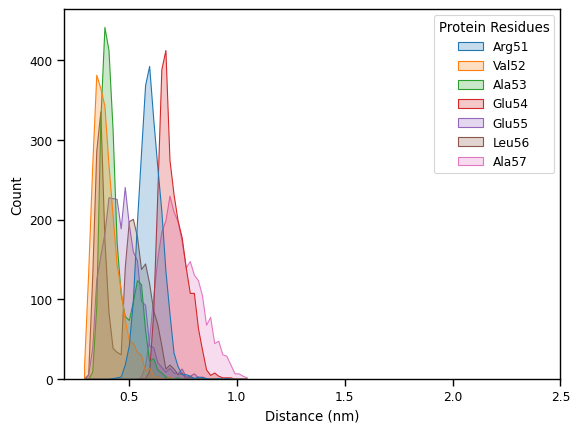

In [35]:
plot_hist_cdist(names_hinge,5)